Explore the variables in the data file ToyotaCorolla.csv .

In [1]:
import pandas as pd
import seaborn as sns  # New code for plotting joint distributions.

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_path  = 'ToyotaCorolla.csv'
data = pd.read_csv(file_path)
print(data.shape)  # (1436, 10)
del file_path

(1436, 10)


In [3]:
data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


9 features

	(
	5 numeric : Age (1 to 80), KM (1 to 243000), HP (39 to 192), CC (== Cubic capacity: 1300 to 2000), Weight (1000 to 1615);

	3 categorical encoded by numbers: MetColor (0, 1), Automatic (0, 1), Doors (2 to 5);
	
	1 categorical encoded by name: FuelType (in: Petrol, Diesel, CNG == compressed natural gas)
	).

	The target variable (Price) is between 4350 and 32500.
	
	Cubic capacity : https://www.cinch.co.uk/jargon/cc-cubic-capacity
	compressed natural gas : https://en.wikipedia.org/wiki/Natural_gas_vehicle




Identify missing data.

In [4]:
data.isnull().sum()
# zeroes! No missing data.

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

Types of data and ranges of variables?

In [5]:
# types of data
data.dtypes
# FuelType: object , all other columns : int64


Price         int64
Age           int64
KM            int64
FuelType     object
HP            int64
MetColor      int64
Automatic     int64
CC            int64
Doors         int64
Weight        int64
dtype: object

In [6]:
data_enc_nbs = data.select_dtypes(include='number')  # 9 columns
print(data_enc_nbs.shape)  # (1436, 9)
print(data.shape)  # (1436, 10)

print(data_enc_nbs.max())
print(data_enc_nbs.min())

(1436, 9)
(1436, 10)
Price         32500
Age              80
KM           243000
HP              192
MetColor          1
Automatic         1
CC             2000
Doors             5
Weight         1615
dtype: int64
Price        4350
Age             1
KM              1
HP             69
MetColor        0
Automatic       0
CC           1300
Doors           2
Weight       1000
dtype: int64


In [7]:
target = data.columns[0]
# print('The price variable is:', target)  # 'Price'

Histogram of the target variable.

<Axes: >

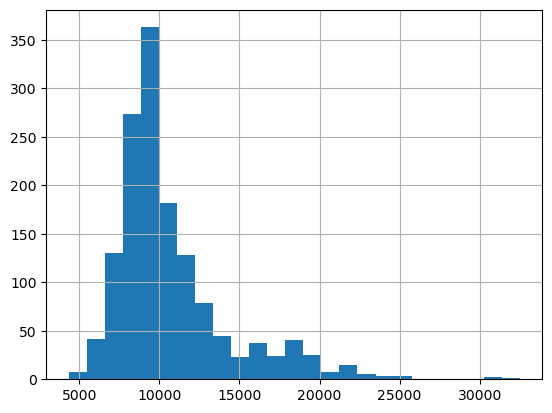

In [8]:
data[target].hist(bins=25)

Histograms of the categorical variables.

MetColor
1    969
0    467
Name: count, dtype: int64

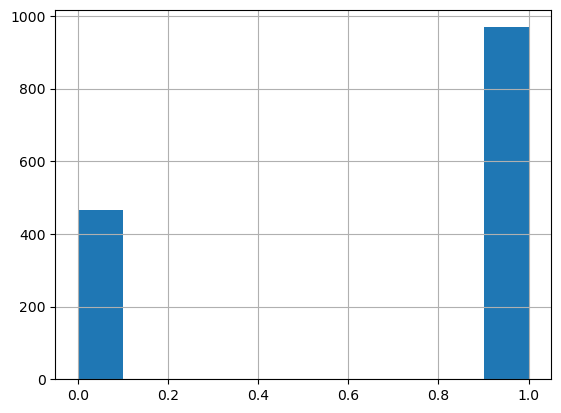

In [9]:
data['MetColor'].hist()
data['MetColor'].value_counts()
# 969 occurrences of 1, 467 occurrences of 0.

Automatic
0    1356
1      80
Name: count, dtype: int64

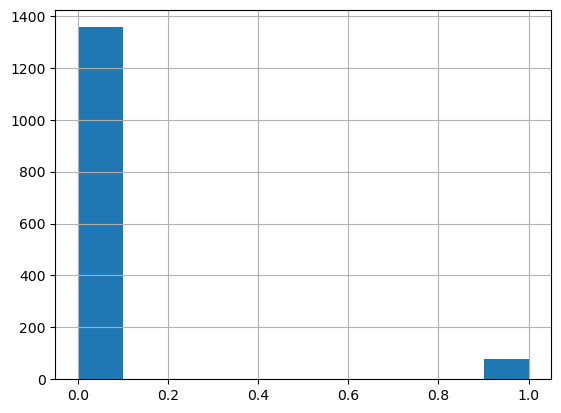

In [10]:
data['Automatic'].hist()  
data['Automatic'].value_counts()
# 80 Automatic cars, 1356 manual

Doors
5    674
3    622
4    138
2      2
Name: count, dtype: int64

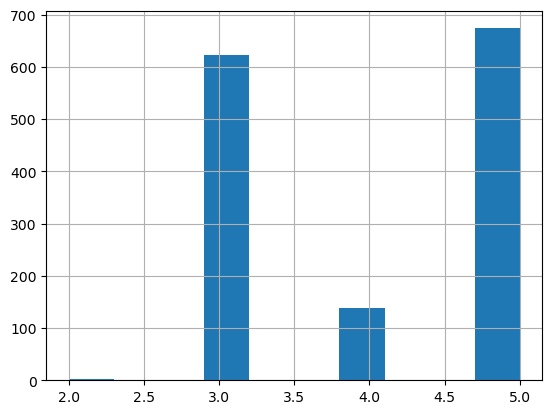

In [11]:
data['Doors'].hist()  
data['Doors'].value_counts()
# [2, 622, 138, 674]

FuelType
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

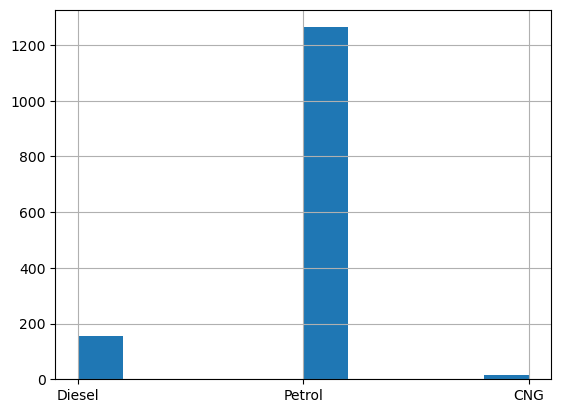

In [12]:
data['FuelType'].hist()  
data['FuelType'].value_counts()
# Petrol    1264
# Diesel     155
# CNG         17

Some categorical features are imbalanced! For instance, the smallest classes for features Automatic (80), Doors (2), FuelType (17) are rare.

My simple regression "by hand" will discard the categorical features altogether.

Correlations between numerical features?

In [13]:
numerical_features = ['Age', 'KM', 'HP', 'CC', 'Weight']
# The names of features are spelled right:
# print(set(numerical_features).issubset(set( data.columns)))  # True

"""
Correlations of numerical features:

             Age        KM        HP        CC    Weight
Age     1.000000  0.505672 -0.156622 -0.133182 -0.470253
KM      0.505672  1.000000 -0.333538  0.302150 -0.028598
HP     -0.156622 -0.333538  1.000000  0.050884  0.089614
CC     -0.133182  0.302150  0.050884  1.000000  0.651450
Weight -0.470253 -0.028598  0.089614  0.651450  1.000000

Correlated pairs:
    Weight, CC;
    Age, KM;
    Age, Weight (negative correlation) .
    
Surprisingly, CC and HP are not correlated at all.
"""
corr_df = data[numerical_features].corr()
print(corr_df)

             Age        KM        HP        CC    Weight
Age     1.000000  0.505672 -0.156622 -0.133182 -0.470253
KM      0.505672  1.000000 -0.333538  0.302150 -0.028598
HP     -0.156622 -0.333538  1.000000  0.050884  0.089614
CC     -0.133182  0.302150  0.050884  1.000000  0.651450
Weight -0.470253 -0.028598  0.089614  0.651450  1.000000


Joint distributions of the target and each numerical feature. 

In [14]:
def plt_target_of_feature(in_feature):
    sns.jointplot(data=data,x=in_feature,y=target)
    return None

/home/alex/anaconda3/envs/ML1_7_pipelines/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alex/anaconda3/envs/ML1_7_pipelines/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alex/anaconda3/envs/ML1_7_pipelines/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alex/anaconda3/envs/ML1_7_pipelines/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

[None, None, None, None, None]

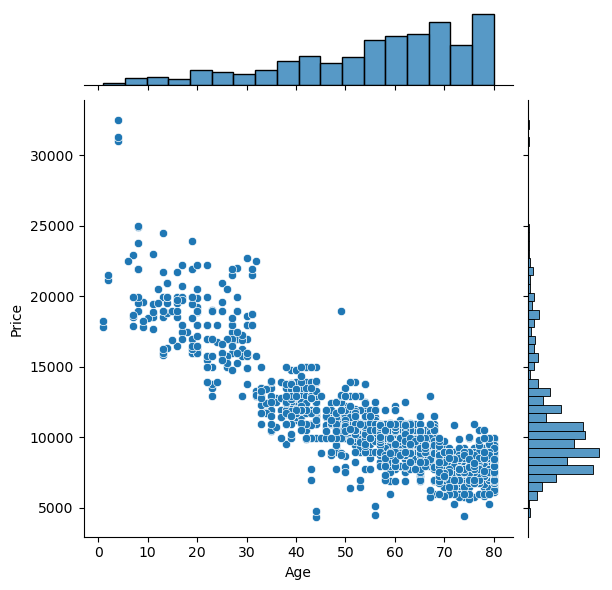

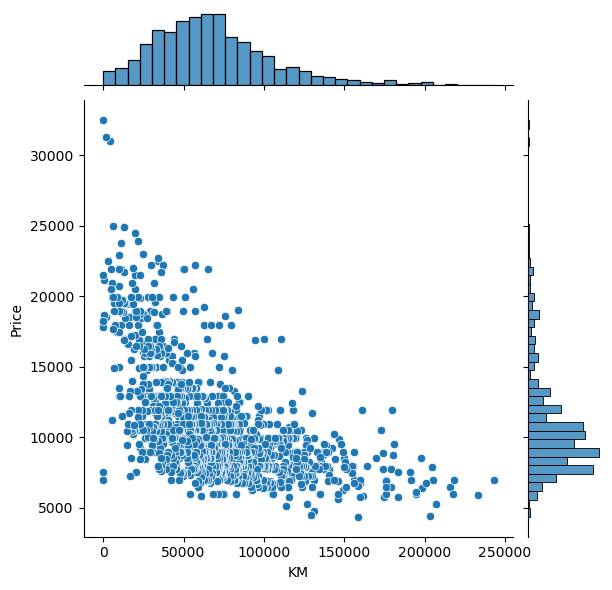

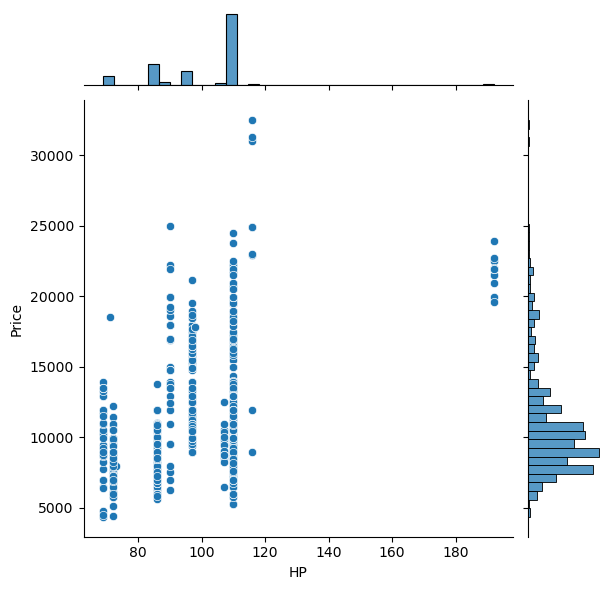

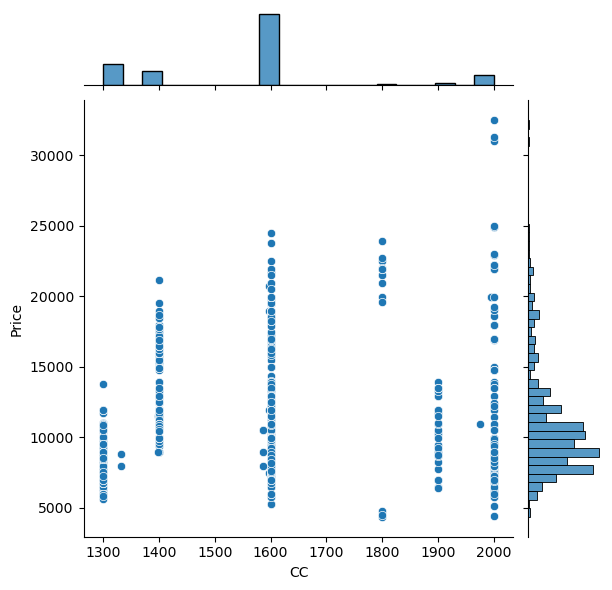

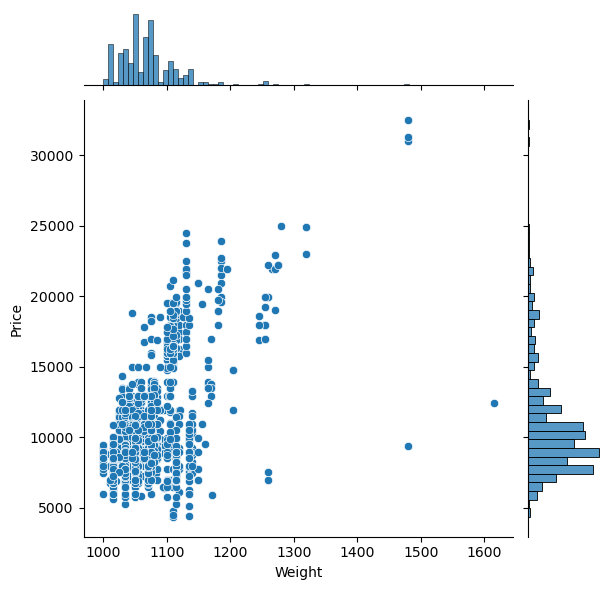

In [15]:
list(map(plt_target_of_feature,numerical_features))

# The dependence on Age looks like a hyperbola, Price = k/Age.

# The dependence on KM looks like an upper bound: Price< k* KM

# The price is (roughly) positively correlated with HP, CC, Weight.


Add regression lines on each single feature.

See: 
https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot

The histograms are not very useful here!
'jointplot' can be replaced by 'regplot', enabling plotting the lines and CI in a different color.

[<Axes: xlabel='Age', ylabel='Price'>,
 <Axes: xlabel='KM', ylabel='Price'>,
 <Axes: xlabel='HP', ylabel='Price'>,
 <Axes: xlabel='CC', ylabel='Price'>,
 <Axes: xlabel='Weight', ylabel='Price'>]

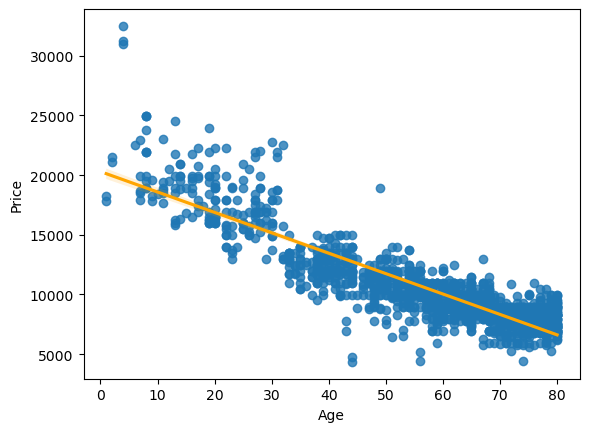

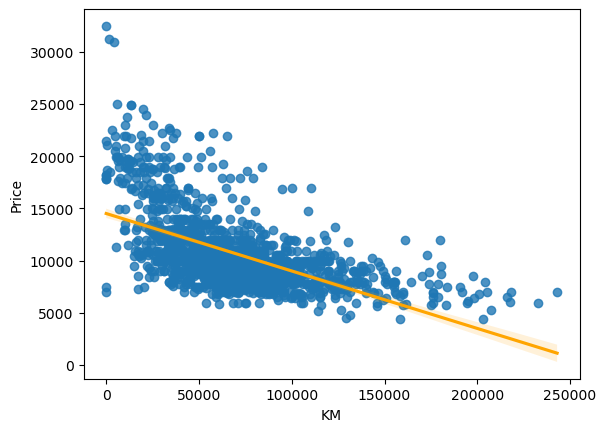

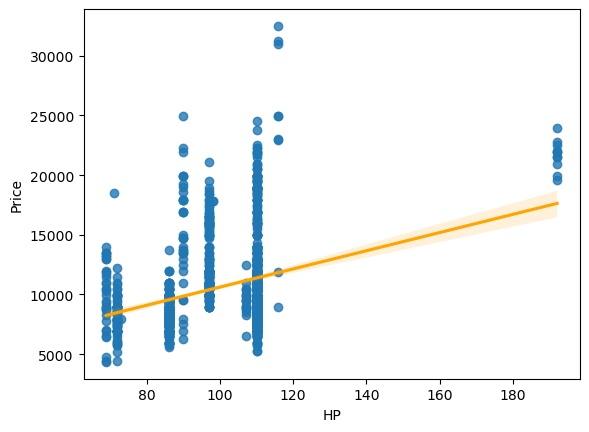

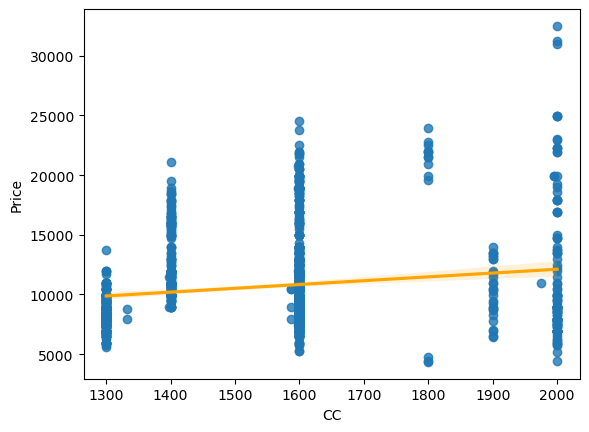

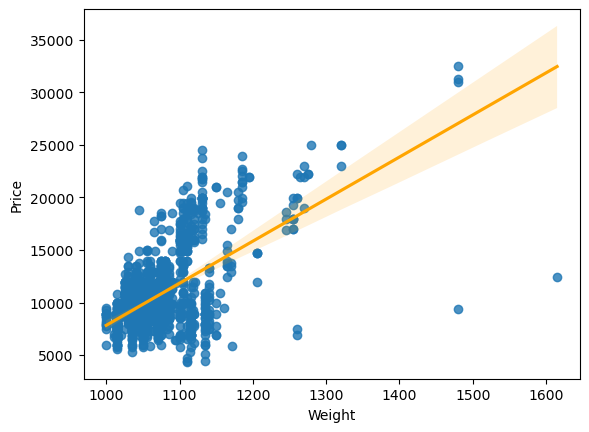

In [16]:
def regplt_target(in_feature):
    fig, ax = plt.subplots()
    return sns.regplot(data=data, x=in_feature, y=target, ax=ax, line_kws={'color': 'orange'})
    # return None

list(map(regplt_target, numerical_features))

The positive correlation with HP and Weight seems obvious on these plots!

Does the data show influence of the categorical feature 'Automatic'? 

/home/alex/anaconda3/envs/ML1_7_pipelines/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alex/anaconda3/envs/ML1_7_pipelines/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alex/anaconda3/envs/ML1_7_pipelines/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alex/anaconda3/envs/ML1_7_pipelines/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

[None, None, None, None, None]

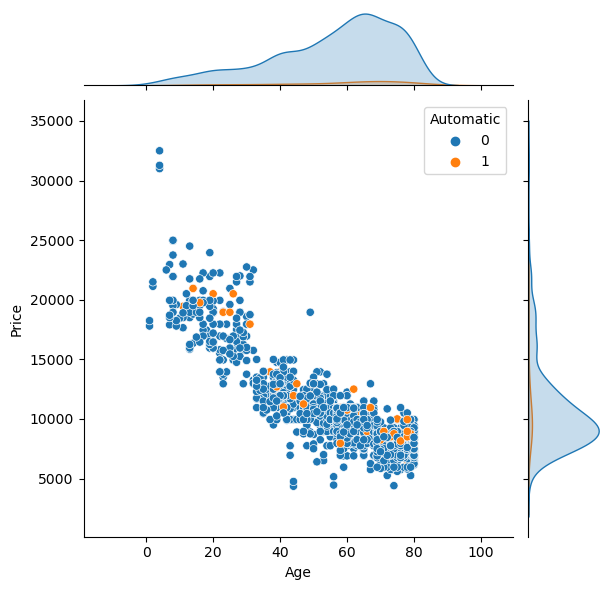

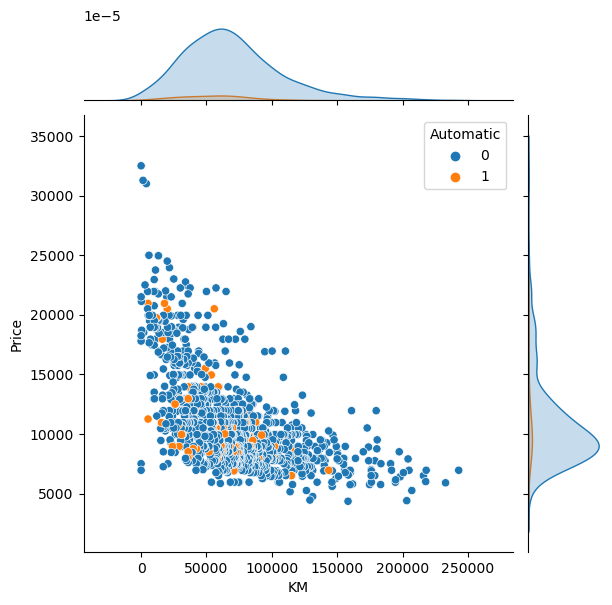

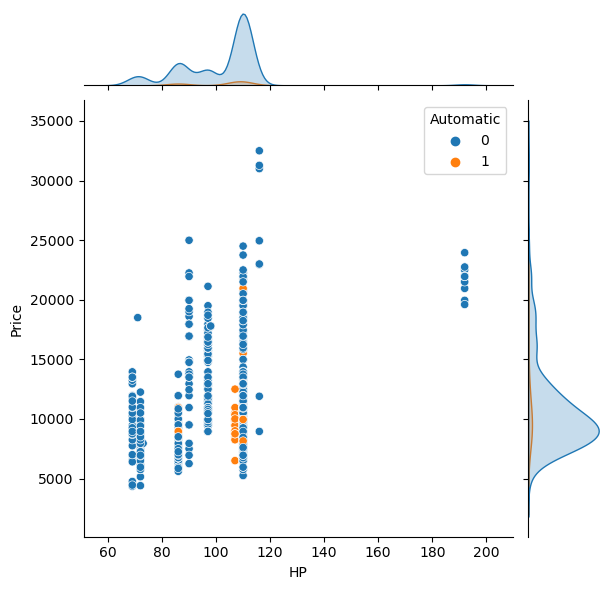

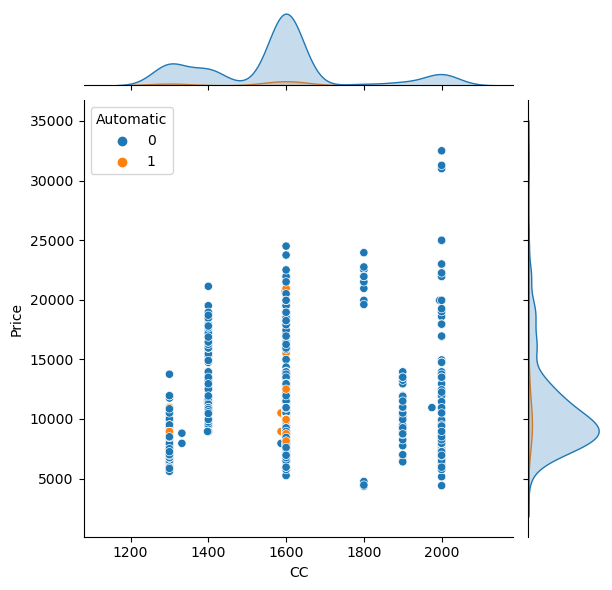

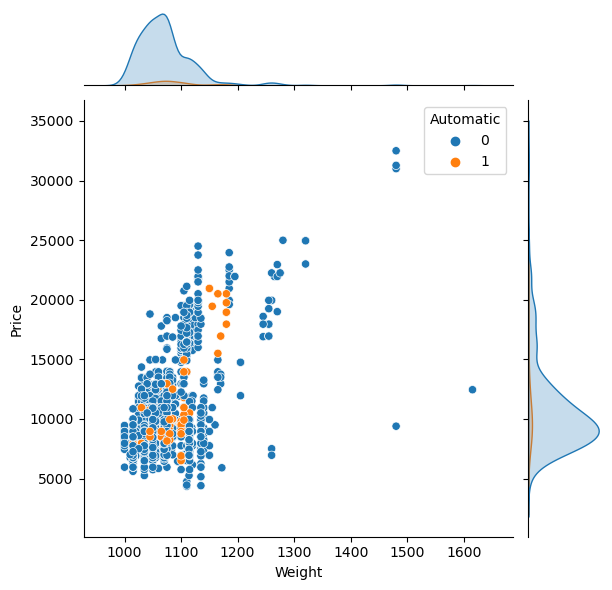

In [17]:
def plt_target_of_2features(in_feature):
    sns.jointplot(data=data, x=in_feature, y=target, hue="Automatic")
    return None

list(map(plt_target_of_2features, numerical_features))

All automatic cars, except one have the same volume of the engine! Their prices seem quite well distributed. This confirms the idea of discarding this feature from the simple solution. The next script 'lin_reg_crossval' shows the performance of the linear regression on 3 numerical features.